<a href="https://colab.research.google.com/github/rakijja/Projekt_regresja/blob/main/Projekt_regresja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wstęp

In [ ]:
# zainstalowanie pandas profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [ ]:
# import bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from pandas_profiling import ProfileReport

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from google.colab import files
import io

In [ ]:
# wczytanie danych
uploaded = files.upload()

Saving epi_r.csv to epi_r.csv


# Przetwarzanie danych

In [ ]:
# przypisanie zmiennych
df = pd.read_csv("epi_r.csv")
df2 = df.copy()
df.head()

In [ ]:
# usunięcie wierszy z wartościami NaN
df.dropna(inplace=True)

In [ ]:
# sprawdzenie wystąpień ocen
from collections import Counter
Counter(df["rating"])

Counter({2.5: 405,
         4.375: 6552,
         3.75: 4136,
         3.125: 1165,
         1.875: 81,
         5.0: 2106,
         0.0: 1296,
         1.25: 123})

In [ ]:
# usunięcie wierszy z oceną 0
df = df.loc[df["rating"] != 0.0]

In [ ]:
# czyszczenie outlierów
upper_lim = df['fat'].quantile(.95)
lower_lim = df['fat'].quantile(.05)
df = df[(df['fat']<upper_lim) & (df['fat']>lower_lim)]

upper_lim = df['calories'].quantile(.95)
lower_lim = df['calories'].quantile(.05)
df = df[(df['calories']<upper_lim) & (df['calories']>lower_lim)]

upper_lim = df['sodium'].quantile(.95)
lower_lim = df['sodium'].quantile(.05)
df = df[(df['sodium']<upper_lim) & (df['sodium']>lower_lim)]

upper_lim = df['protein'].quantile(.95)
lower_lim = df['protein'].quantile(.05)
df = df[(df['protein']<upper_lim) & (df['protein']>lower_lim)]

In [ ]:
# stworzenie kolumn podziału na mięsne/ bezmięsne
df["with_meat"] = (df["bacon"] + df["beef"] + df["beef rib"] + df["beef shank"] + df["beef tenderloin"] + df["buffalo"] + df["chicken"] + df["duck"] 
                   + df["goose"] + df["ground beef"] + df["ground lamb"] + df["lamb"] + df["lamb chop"] + df["lamb shank"] + df["meat"] + df["meatball"]
                   + df["meatloaf"] + df["pork"] + df["pork chop"] + df["pork rib"] + df["pork tenderloin"] + df["poultry"] + df["poultry sausage"]
                   + df["quail"] + df["rabbit"] + df["sausage"] + df["steak"] + df["veal"] + df["turkey"]) 
# ujednolicenie do wartosci 0 i 1
df.loc[df["with_meat"] > 1, "with_meat"] = 1

In [ ]:
# stworzenie kolumny z liczbą tagów
df['num_tags'] = df.iloc[:, 6:].sum(axis=1)

In [ ]:
# usunięcie zbędnych kolumn
columns_to_keep = ["title", "rating", "calories", "protein", "fat", "sodium","with_meat", "breakfast", "lunch", "dinner", "num_tags"]
df = df[columns_to_keep]

# Wizualizacja

In [ ]:
# utworzenie podtabeli z tłuszczem
df_rating_fat = df.groupby("rating").agg(min=("fat","min"),
                                             mean=("fat", "mean"),
                                             max=("fat","max"))

In [ ]:
# utworzenie podtabeli z tagami
df_rating_tags = df.groupby("rating").agg(min=("num_tags","min"),
                                             mean=("num_tags", "mean"),
                                             max=("num_tags","max"))

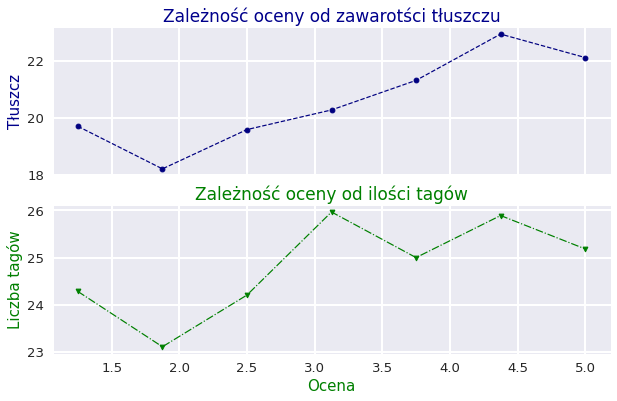

In [ ]:
# wykres liniowy rating - fat
fig,ax=plt.subplots(2,1,sharex=True, figsize=(10,6))
sns.set_style("darkgrid")
sns.set_context("paper", font_scale = 1.5, rc={"grid.linewidth": 2})
ax[0].plot(df_rating_fat.index,df_rating_fat["mean"], marker ="o", linestyle="--", color="navy")
ax[0].set_ylabel("Tłuszcz", fontsize=15, color="darkblue")
ax[0].set_title("Zależność oceny od zawarotści tłuszczu", fontsize=17, color="darkblue")

ax[1].plot(df_rating_tags.index,df_rating_tags["mean"], marker ="v", linestyle="-.", color="g")
ax[1].set_xlabel("Ocena", fontsize=15, color="g")
ax[1].set_ylabel("Liczba tagów", fontsize=15, color="g")
ax[1].set_title("Zależność oceny od ilości tagów", fontsize=17, color="g")
plt.show()

<Axes: >

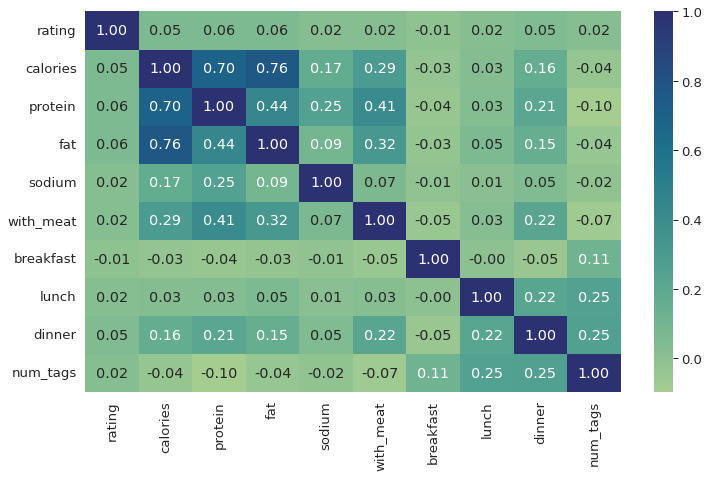

In [ ]:
# heatmapa
corr = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="crest")

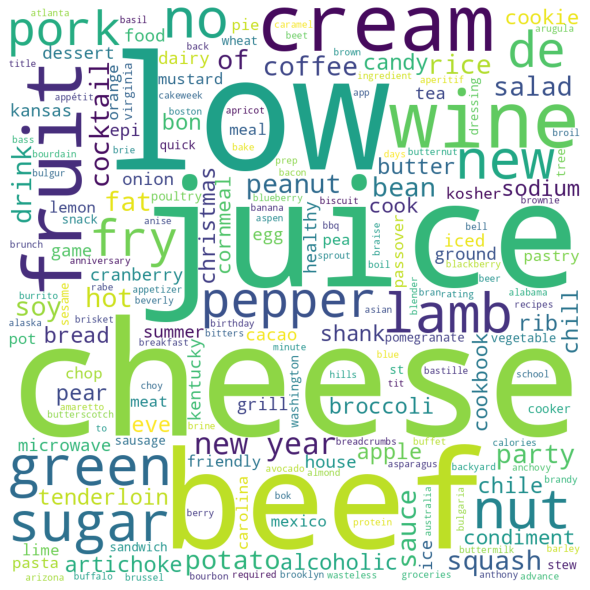

In [ ]:
# mapa słów top 50 categories
top_titles = df2.sort_values("rating", ascending=False).head(50)
title_string = " ".join(top_titles)
wordcloud = WordCloud(width = 1000, height = 1000,
                      background_color ="white",
                      stopwords = ["and","with","day","free"], 
                      min_font_size = 10).generate(title_string)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
# Pandas profiling
profile = ProfileReport(
    df,  title='Food EPI', html={'style':{'full_width':True}}
)

In [ ]:
# zapisanie do pliku
profile.to_file("Food_epi_simple")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/pandas_profiling/profile_report.py:262: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Regresja Liniowa

In [ ]:
# przypisanie zmiennych
X = df[["calories", "protein", "fat", "sodium", "with_meat", "breakfast", "lunch", "dinner", "num_tags"]].values # Zmienne niezależne
y = df["rating"].values # Zmienna zależna

In [ ]:
# podzial na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=111)

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
print(linear_model.intercept_) # theta0
print(linear_model.coef_) # theta1

3.999837922475287
[ 7.93272755e-06 -3.16787893e-03  2.89330930e-03  4.79040657e-05
  1.32219587e-02 -4.61302438e-02  1.33409593e-02  8.02079611e-02
  2.30295866e-03]


In [ ]:
linear_pred = linear_model.predict(X_test)

Metryki Oceny Regresji liniowej

In [ ]:
# MAE - Mean Absolute Error. Średni błąd predykcji
print(f"Linear Regression MAE: {round(mean_absolute_error(y_test, linear_pred), 2)}")
# RMSE - Root Mean Squared Error. To samo co MSE ale pod pierwiastkiem, bardziej przystępna wielkość wartości
print(f"Linear Regression RMSE: {round(mean_squared_error(y_test, linear_pred, squared=False), 2)}")
# R2 - Jaki %y tłumaczy nasz model?
print(f"Linear Regression R2 score: {round(r2_score(y_test, linear_pred), 2)}")

Linear Regression MAE: 0.49
Linear Regression RMSE: 0.64
Linear Regression R2 score: 0.01


# Drzewo Decyzyjne

In [ ]:
# podzial na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=111)

Kroswalidacja

In [ ]:
model = tree.DecisionTreeRegressor()

In [ ]:
gs = GridSearchCV(model,
                  param_grid = {"max_depth" : range(1,20),
                                "min_samples_split" : range(10, 200, 10)
                                },
                  cv = 10,
                  scoring="neg_mean_absolute_error")

gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 20),
                         'min_samples_split': range(10, 200, 10)},
             scoring='neg_mean_absolute_error')

In [ ]:
# wypisanie optymalnych parametrów
print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 14, 'min_samples_split': 160}
-0.501855990713483


In [ ]:
# trenowanie modeli
base_model = tree.DecisionTreeRegressor()
base_model.fit(X_train, y_train)

tune_model = tree.DecisionTreeRegressor(max_depth=14, min_samples_split=160)
tune_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=14, min_samples_split=160)

In [ ]:
base_pred = base_model.predict(X_test)
tuned_pred = tune_model.predict(X_test)

print("Base model MAE: "+ str(mean_absolute_error(base_pred, y_test)))
print()
print(f"Decision Tree MAE: {round(mean_absolute_error(y_test, tuned_pred), 2)}")
print(f"Decision Tree R2 score: {round(r2_score(y_test, base_pred), 2)}")
print(f"Decision Tree RMSE: {round(mean_squared_error(y_test, tuned_pred, squared=False), 2)}")

Base model MAE: 0.5812641083521445

Decision Tree MAE: 0.49
Decision Tree R2 score: -0.86
Decision Tree RMSE: 0.65
